In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('login_arquivo.csv')
for i in range(1,9991):
  if (i%2)==0:
    df=df.drop(i)

In [ ]:
df=df.drop(0)

In [ ]:
def get_rows_in_df(df):
    return int(df.describe().loc['count'][0])

In [ ]:
df['year']

1       2017.0
3       2017.0
5       2019.0
7       2019.0
9       2019.0
         ...  
9983    2023.0
9985    2023.0
9987    2023.0
9989    2023.0
9991    2023.0
Name: year, Length: 4996, dtype: float64

In [ ]:
x={2017:0, 2018:0, 2019:0, 2020:0, 2021:0, 2022:0, 2023:0}
for i in range(get_rows_in_df(df)):
  x[int(df.iloc[i].year)]+=1


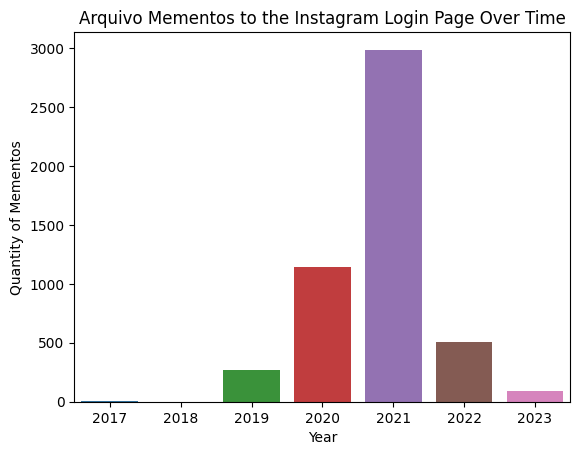

In [ ]:
sns.barplot(x=list(x.keys()), y=list(x.values()))

# Set plot labels
plt.xlabel('Year')
plt.ylabel('Quantity of Mementos')
plt.title('Arquivo Mementos to the Instagram Login Page Over Time')

# Display the plot
plt.show()

In [ ]:
df_2019=df[df['year']==2019.0]
df_2019.head(20)

,year,urim,date,time
5,2019.0,https://arquivo.pt/wayback/20190808035347/http...,8/8/2019,3:53:47
7,2019.0,https://arquivo.pt/wayback/20190821190352/http...,8/21/2019,19:03:52
9,2019.0,https://arquivo.pt/wayback/20190822170715/http...,8/22/2019,17:07:15
11,2019.0,https://arquivo.pt/wayback/20190823171634/http...,8/23/2019,17:16:34
13,2019.0,https://arquivo.pt/wayback/20190824170633/http...,8/24/2019,17:06:33
15,2019.0,https://arquivo.pt/wayback/20190825171524/http...,8/25/2019,17:15:24
17,2019.0,https://arquivo.pt/wayback/20190826171612/http...,8/26/2019,17:16:12
19,2019.0,https://arquivo.pt/wayback/20190827171707/http...,8/27/2019,17:17:07
21,2019.0,https://arquivo.pt/wayback/20190828170828/http...,8/28/2019,17:08:28
23,2019.0,https://arquivo.pt/wayback/20190829172942/http...,8/29/2019,17:29:42


In [ ]:
month_login={1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}

In [ ]:
for i in range(get_rows_in_df(df_2019)):
  if df.iloc[i].date.startswith('10/'):
    month_login[10]+=1
  elif df.iloc[i].date.startswith('11/'):
    month_login[11]+=1
  elif df.iloc[i].date.startswith('12/'):
    month_login[12]+=1
  else:
    month=int(df.iloc[i].date[0])
    month_login[month]+=1

In [ ]:
month_login

{1: 0,
 2: 2,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 12,
 9: 54,
 10: 30,
 11: 84,
 12: 83}

In [ ]:
sum(list(month_login.values()))

265

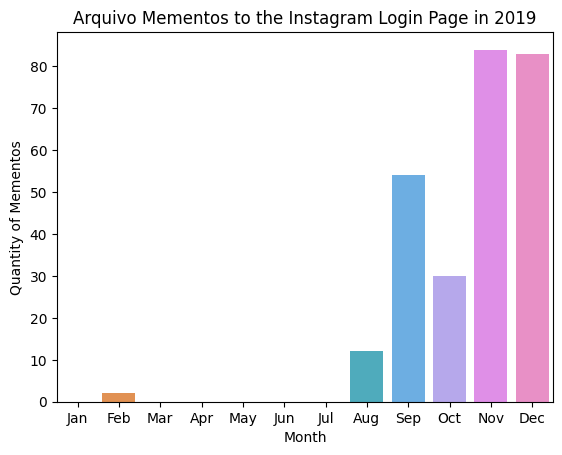

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x=months, y=list(month_login.values()))

# Set plot labels
plt.xlabel('Month')
plt.ylabel('Quantity of Mementos')
plt.title('Arquivo Mementos to the Instagram Login Page in 2019')

# Display the plot
plt.show()

In [ ]:
# new dataset
df=pd.read_csv('t25_arquivo.csv')
df.year.unique()

array([2016, 2018, 2019, 2020, 2021, 2022, 2023, 2017, 2015])

In [ ]:
df_redirect=df[df['status_code'].isin([301,302])]
df_success=df[df['status_code']==200]
df_redirect.year.unique()

array([2016, 2018, 2019, 2020, 2021, 2022, 2023, 2017])

In [ ]:
def get_df_by_year(df, year):
    return df[df['year']==year]

def evaluate_redirects_to(df):
  result={'login':0, '2xx':0}
  for x in range(get_rows_in_df(df)):
      redirect_type=df.iloc[x].redirect_type
      if redirect_type in result.keys():
        result[redirect_type]+=1
      else:
        result[redirect_type]=1
  return result

def get_percentage_replayable_for_year(df, year):
  # get only the mementos in the given year
  df_for_year=get_df_by_year(df, year)
  print(get_rows_in_df(df_for_year))

  #get successes
  df_success=df_for_year[df_for_year['status_code']==200]
  successes=get_rows_in_df(df_success)

  #get redirections(3xx)
  df_redirection=df_for_year[df_for_year['status_code'].isin([301, 302])]
  print(evaluate_redirects_to(df_redirection))
  redirection_to_login=evaluate_redirects_to(df_redirection)['login']

  replayable=successes

  print('replayable in '+str(year)+': ', replayable)
  #all mementos in year - (all redirections - redirections to login)
  total=get_rows_in_df(df_for_year)-(get_rows_in_df(df_redirection)-redirection_to_login)
  print('total in '+str(year)+': ', total)
  print('percentage replayable in', year, ': ')
  if total==0:
    return float('nan')
  print("{0:.2f}%".format(replayable/total * 100))
  return round((replayable/total * 100), 2)

In [ ]:
get_percentage_replayable_for_year(df, 2019)

345
{'login': 65, '2xx': 65, nan: 10}
replayable in 2019:  205
total in 2019:  270
percentage replayable in 2019 : 
75.93%


75.93

In [ ]:
percentage_replayable_top_25=[]
for year in range(2015,2024):
  percent=get_percentage_replayable_for_year(df, year)
  percentage_replayable_top_25.append(percent)
print(percentage_replayable_top_25)

11
{'login': 0, '2xx': 0}
replayable in 2015:  10
total in 2015:  11
percentage replayable in 2015 : 
90.91%
28
{'login': 0, '2xx': 17}
replayable in 2016:  10
total in 2016:  11
percentage replayable in 2016 : 
90.91%
4
{'login': 0, '2xx': 3, nan: 1}
replayable in 2017:  0
total in 2017:  0
percentage replayable in 2017 : 
166
{'login': 5, '2xx': 46, nan: 3}
replayable in 2018:  112
total in 2018:  117
percentage replayable in 2018 : 
95.73%
345
{'login': 65, '2xx': 65, nan: 10}
replayable in 2019:  205
total in 2019:  270
percentage replayable in 2019 : 
75.93%
691
{'login': 430, '2xx': 146, nan: 27}
replayable in 2020:  88
total in 2020:  518
percentage replayable in 2020 : 
16.99%
107
{'login': 105, '2xx': 0, nan: 2}
replayable in 2021:  0
total in 2021:  105
percentage replayable in 2021 : 
0.00%
212
{'login': 119, '2xx': 8, 'home': 2, nan: 7}
replayable in 2022:  64
total in 2022:  195
percentage replayable in 2022 : 
32.82%
117
{'login': 102, '2xx': 2, nan: 4}
replayable in 2023

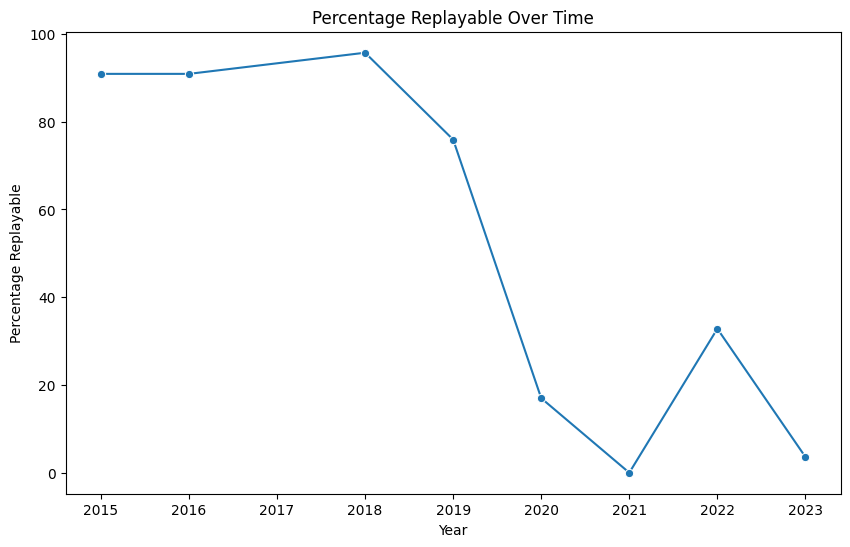

In [ ]:
plt.figure(figsize=(10, 6))
years=[2015,2016,2017,2018,2019,2020,2021,2022,2023]

lineplot=sns.lineplot(x=years, y=percentage_replayable_top_25, marker='o')
#plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Percentage Replayable')
plt.title('Percentage Replayable Over Time')
# Add percentage annotations to the line plot
#for i in range(len(years)):
    #lineplot.annotate(f'{percentage_replayable_list[i]}%', (years[i], percentage_replayable_list[i]), ha='center', va='bottom')

# Show the plot
plt.show()